# momentum

In [1]:
import numpy as np
import matplotlib.animation as animation
data = np.array([[80,200],[95,230],[104,245],[112,247],[125,259],[135,262]])
#m,b,mse的变化过程
mhistory = []
bhistory = []
msehistory = []

Weight = np.ones((2,1))
ones = np.ones((len(data),1))
Feature = np.hstack((data[:,0:1],ones))
print(Feature)
label = data[:,1:2]
print(label)
learningrate = 0.00002

v = np.zeros((2,1))

def gradentdecent():
    global learningrate,v,Weight
    mse = np.sum(np.square(np.dot(Feature,Weight)-label))
    msehistory.append(mse)
    #计算m和b的梯度
    slop = np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    v = v*0.99-learningrate*slop
    Weight = Weight+v
    mhistory.append(Weight[0][0])
    bhistory.append(Weight[1][0])
    

[[ 80.   1.]
 [ 95.   1.]
 [104.   1.]
 [112.   1.]
 [125.   1.]
 [135.   1.]]
[[200]
 [230]
 [245]
 [247]
 [259]
 [262]]


In [2]:
for i in range (50000):
    gradentdecent()

<IPython.core.display.Javascript object>


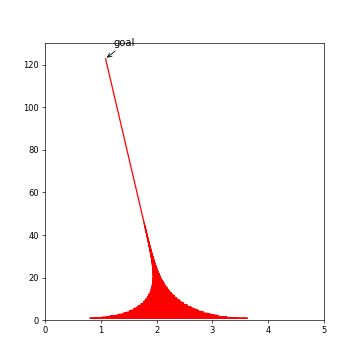

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)

axis_name, =  plt.plot(mhistory[0:100],bhistory[0:100],c='r')

plt.annotate("goal",xy=(1.0859,122.68), xytext=(+10, +15),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistory[0:num*100],bhistory[0:num*100])

animation.FuncAnimation(fig,update,np.arange(0,501),interval=20,repeat=False)

# adagrad

In [7]:
import numpy as np
# 导入动画包
import matplotlib.animation as animation
data = np.array([
    [80,200],
    [95,230],
    [104,245],
    [112,247],
    [125,259],
    [135,262]
])

# 两个数组记录m和b的变化过程
mhistroy=[]
bhistroy=[]
# 记录mse的变化过程
msehistory=[]

Weight  =np.ones((2,1)) # m和b 采用矩阵的方式指定权重
ones = np.ones((len(data),1))
Feature = np.hstack((data[:,0:1],ones))
label = data[:,1:2]

learningrate = 2

#初始化cache 记录m和b的变化率
cache = np.zeros((2,1))

def gradentdecent1(): #采用矩阵的方式梯度下降
    global Weight,learningrate,cache
    # 计算的是m和b的梯度
    slop = np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    mse = np.sum(np.square(np.dot(Feature,Weight)-label))
    msehistory.append(mse)

    ## 关键代码，考虑历史的梯度变化率
    ## 如果历史偏差大， 惩罚收敛。历史变化小，激励收敛
    cache = cache + slop**2
    Weight = Weight - learningrate*slop/np.sqrt(cache+0.0000000001)
    mhistroy.append(Weight[0][0])
    bhistroy.append(Weight[1][0])

In [8]:
for i in range(50000):
    gradentdecent1()  

<IPython.core.display.Javascript object>


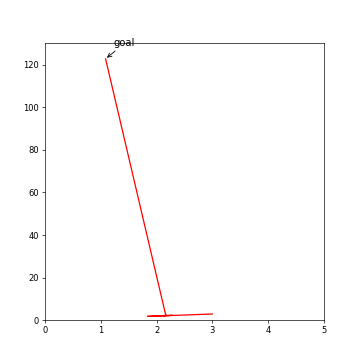

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)

axis_name, =  plt.plot(mhistroy[0:100],bhistroy[0:100],c='r')

plt.annotate("goal",xy=(1.0859,122.68), xytext=(+10, +15),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistroy[0:num*100],bhistroy[0:num*100])

animation.FuncAnimation(fig,update,np.arange(0,501),interval=20,repeat=False)

# rmsprop

In [12]:
import numpy as np
# 导入动画包
import matplotlib.animation as animation
data = np.array([
    [80,200],
    [95,230],
    [104,245],
    [112,247],
    [125,259],
     [135,262]
])

# 两个数组记录m和b的变化过程
mhistroy=[]
bhistroy=[]
# 记录mse的变化过程
msehistory=[]

Weight  =np.ones((2,1)) # m和b 采用矩阵的方式指定权重
ones = np.ones((len(data),1))
Feature = np.hstack((data[:,0:1],ones))
label = data[:,1:2]

learningrate = 0.1

# 记录历史的梯度变换 m，b
cache = np.ones((2,1))
decay = 0.9

def grandentdecent2():
    global Weight,cache,learningrate
    # 计算mse
    mse = np.sum(np.square(np.dot(Feature,Weight)-label))
    msehistory.append(mse)
    # 计算slop
    slop = np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    
    ##关键代码，rmsprop
    ## 记录历史变换，使用decay表示衰减
    cache = decay*cache + (1-decay)*slop**2
    Weight = Weight - learningrate * slop/np.sqrt(cache+0.000000001)
    
    mhistroy.append(Weight[0][0])
    bhistroy.append(Weight[1][0])

In [13]:
for i in range(50000):
    grandentdecent2()   

<IPython.core.display.Javascript object>


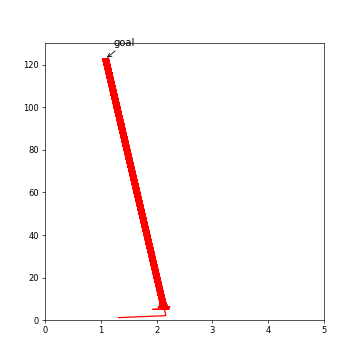

In [14]:
## 以动画的方式展示m和b收敛的过程

%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)

axis_name, =  plt.plot(mhistroy[0:100],bhistroy[0:100],c='r')

plt.annotate("goal",xy=(1.0859,122.68), xytext=(+10, +15),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistroy[0:num*100],bhistroy[0:num*100])

animation.FuncAnimation(fig,update,np.arange(0,501),interval=20,repeat=False)

# adarm

In [15]:
import numpy as np
# 导入动画包
import matplotlib.animation as animation
data = np.array([
    [80,200],
    [95,230],
    [104,245],
    [112,247],
    [125,259],
     [135,262]
])

# 两个数组记录m和b的变化过程
mhistroy=[]
bhistroy=[]
# 记录mse的变化过程
msehistory=[]

Weight  =np.ones((2,1)) # m和b 采用矩阵的方式指定权重
ones = np.ones((len(data),1))
Feature = np.hstack((data[:,0:1],ones))
label = data[:,1:2]

learningrate = 0.1

m = np.zeros((2,1)) # 记录的mse对m和b变化率的惯性
v = np.zeros((2,1)) # 记录的mse对m和b变化率的速度

def grandentdecent3():
    global Weight,m,v,learningrate
    # 计算mse
    mse = np.sum(np.square(np.dot(Feature,Weight)-label))
    msehistory.append(mse)
    # 计算slop
    slop = np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    ## adam的核心逻辑
    beta_1 = 0.9
    beta_2 = 0.999
    
    m = beta_1*m +(1-beta_1)*slop
    v = beta_2*v  +(1-beta_2)*(slop**2)
    m_p = m/(1-beta_1)
    v_p = v/(1-beta_2)
    
    Weight = Weight - learningrate*m_p/np.sqrt(v_p+0.000000001)
    
    mhistroy.append(Weight[0][0])
    bhistroy.append(Weight[1][0])

In [16]:
for i in range(50000):
    grandentdecent3()  

<IPython.core.display.Javascript object>


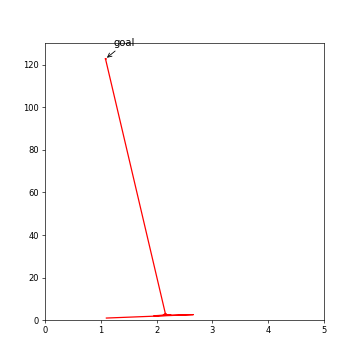

In [17]:
## 以动画的方式展示m和b收敛的过程

%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)

axis_name, =  plt.plot(mhistroy[0:100],bhistroy[0:100],c='r')

plt.annotate("goal",xy=(1.0859,122.68), xytext=(+10, +15),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistroy[0:num*100],bhistroy[0:num*100])

animation.FuncAnimation(fig,update,np.arange(0,501),interval=20,repeat=False)